In [4]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from attr.filters import exclude
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [5]:
df=pd.read_csv(r"C:\Users\medya\Desktop\train SpaceShip.csv")
df0=df.copy()
df.shape

(8693, 14)

In [6]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
L=['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','VIP','Name']
for i in L:
    print(i, ':', df[i].unique(), 'num :', df[i].nunique())


PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] num : 8693
HomePlanet : ['Europa' 'Earth' 'Mars' nan] num : 3
CryoSleep : [False True nan] num : 2
Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] num : 6560
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] num : 3
VIP : [False True nan] num : 2
Name : ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre'] num : 8473


In [10]:
df['HomePlanet'].fillna('Missing', inplace=True)
df['deck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else 'Missing')
df['side'] = df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else 'Missing')
df.drop(columns='Cabin', inplace=True)


C:\Users\medya\AppData\Local\Temp\ipykernel_32692\2887041664.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HomePlanet'].fillna('Missing', inplace=True)


In [11]:
df[df.deck=='Missing'].head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,side
15,0012_01,Earth,False,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,Missing,Missing
93,0101_01,Mars,True,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,Missing,Missing
103,0110_01,Europa,False,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False,Missing,Missing
222,0239_01,Mars,False,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,Missing,Missing
227,0244_01,Mars,True,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True,Missing,Missing


In [12]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [13]:
df.Destination.value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [14]:
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')
print(df.Destination.isnull().sum())

0


In [15]:
df['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

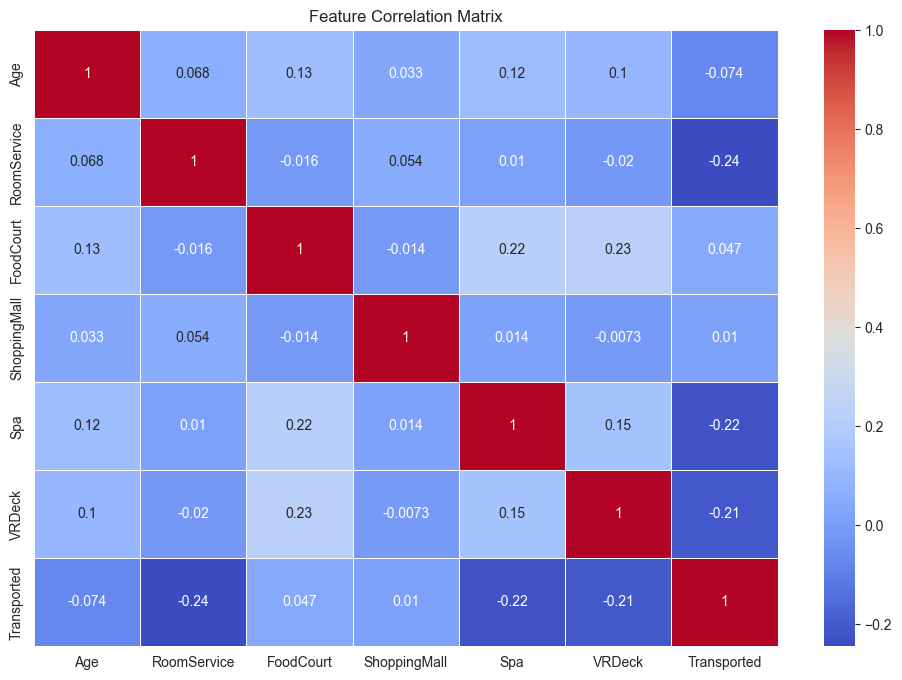

In [16]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


In [17]:
df[df['CryoSleep']==True].head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,side
7,0006_02,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,S
9,0008_01,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,P
10,0008_02,Europa,True,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,B,P
18,0016_01,Mars,True,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True,F,P
21,0020_01,Earth,True,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,E,S


In [18]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Destination       0
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
deck              0
side              0
dtype: int64

In [19]:
df[(df['CryoSleep'].isnull()) & (df['Spa'].isnull())].head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,side
2134,2291_01,Earth,NaN,55 Cancri e,6.0,False,0.0,0.0,0.0,NaN,0.0,Patoya Pittler,False,G,S
3072,3315_01,Earth,NaN,TRAPPIST-1e,15.0,False,10.0,0.0,99.0,NaN,2031.0,NaN,False,F,S
4164,4446_05,Europa,NaN,TRAPPIST-1e,33.0,False,0.0,4017.0,NaN,NaN,2260.0,Phah Chocaters,True,B,S
4834,5157_01,Earth,NaN,TRAPPIST-1e,40.0,False,814.0,12.0,2.0,NaN,79.0,Melia Gardsondez,True,G,S
6904,7314_01,Europa,NaN,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,NaN,0.0,Aldun Venticable,True,C,P


In [20]:
money_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in money_cols:
    df.loc[(df['CryoSleep'] == True) & (df[col].isna()), col] = 0
for col in money_cols:
    mean_value=df[df['CryoSleep']== False][col].mean()
    df.loc[(df['CryoSleep'] == False) & (df[col].isna()), col] = mean_value


In [21]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Destination       0
Age               0
VIP             203
RoomService       2
FoodCourt         3
ShoppingMall      8
Spa               5
VRDeck            7
Name            200
Transported       0
deck              0
side              0
dtype: int64

In [22]:
df.dropna(subset=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], inplace=True)
df.shape

(8669, 15)

In [23]:
def fillna_CryoSleep(row):
    x = 0.0
    for col in money_cols:
        x += row[col]
    if x==0.0:
        return True
    else:
        return False


df['CryoSleep'] = df['CryoSleep'].fillna(df.apply(fillna_CryoSleep, axis=1).astype(bool))


C:\Users\medya\AppData\Local\Temp\ipykernel_32692\633745580.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(df.apply(fillna_CryoSleep, axis=1).astype(bool))


In [24]:
df.dropna(subset=['VIP'], inplace=True)
df.drop(columns='Name', inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8468 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8468 non-null   object 
 1   HomePlanet    8468 non-null   object 
 2   CryoSleep     8468 non-null   bool   
 3   Destination   8468 non-null   object 
 4   Age           8468 non-null   float64
 5   VIP           8468 non-null   object 
 6   RoomService   8468 non-null   float64
 7   FoodCourt     8468 non-null   float64
 8   ShoppingMall  8468 non-null   float64
 9   Spa           8468 non-null   float64
 10  VRDeck        8468 non-null   float64
 11  Transported   8468 non-null   bool   
 12  deck          8468 non-null   object 
 13  side          8468 non-null   object 
dtypes: bool(2), float64(6), object(6)
memory usage: 876.6+ KB


In [26]:
df2=df.copy()
X=df2.drop(['Transported','PassengerId'],axis=1)
X=pd.get_dummies(X)
y=df2['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1234)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1234))
}

grid = {
    'rf': {
        'randomforestclassifier__n_estimators': [100, 200, 300]
    },
    'gb': {
        'gradientboostingclassifier__n_estimators': [100, 200, 300]
    }
}

fit_models = {}

for algo, pipeline in pipelines.items():
    print(f"Training {algo}...")
    model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10)
    model.fit(X_train, y_train)
    fit_models[algo] = model
    print(f"Best parameters for {algo}: {model.best_params_}")
    print(f"Best score for {algo}: {model.best_score_}\n")


Training rf...
Best parameters for rf: {'randomforestclassifier__n_estimators': 300}
Best score for rf: 0.7987945691341725

Training gb...
Best parameters for gb: {'gradientboostingclassifier__n_estimators': 200}
Best score for gb: 0.8057369620440692



In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

for algo, model in fit_models.items():
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    prec=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    print(f'Metricsfor {algo}: accuracy {acc}, precision {prec} recall: {recall} ')

Metricsfor rf: accuracy 0.7786304604486423, precision 0.8106060606060606 recall: 0.740484429065744 
Metricsfor gb: accuracy 0.8004722550177096, precision 0.7922651933701658 recall: 0.8269896193771626 


In [41]:
df_test=pd.read_csv(r"C:\Users\medya\Desktop\test SpaceShip.csv")

In [53]:
df_test.shape

(4277, 13)

In [65]:
def preprocess_data(df):
    df['HomePlanet'] = df['HomePlanet'].fillna('Missing')

    if 'Cabin' in df.columns:
        df['deck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else 'Missing')
        df['side'] = df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else 'Missing')
        df.drop(columns='Cabin', inplace=True)
    else:
        df['deck'] = 'Missing'
        df['side'] = 'Missing'

    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')

    money_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for col in money_cols:
        df.loc[(df['CryoSleep'] == True) & (df[col].isna()), col] = 0
    for col in money_cols:
        mean_value = df[df['CryoSleep'] == False][col].mean()
        df.loc[(df['CryoSleep'] == False) & (df[col].isna()), col] = mean_value

    df.dropna(subset=money_cols, inplace=True)

    def fillna_CryoSleep(row):
        x = sum([row[col] for col in money_cols])
        return x == 0.0

    df['CryoSleep'] = df['CryoSleep'].fillna(df.apply(fillna_CryoSleep, axis=1).astype(bool))

    df.dropna(subset=['VIP'], inplace=True)
    if 'Name' in df.columns:
        df.drop(columns='Name', inplace=True)

    return df


In [66]:
test_SpaceShip1=df_test.copy()
test_SpaceShip1=preprocess_data(test_SpaceShip1)

In [67]:
test_SpaceShip1.shape

(4178, 13)

In [68]:
test_SpaceShip1=pd.get_dummies(test_SpaceShip1.drop('PassengerId', axis=1))

In [69]:
test_SpaceShip1.shape

(4178, 18)

In [72]:
X_test = pd.get_dummies(test_SpaceShip)


X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_pred = fit_models['gb'].predict(X_test)


In [73]:
print(y_pred)

[ True False  True ...  True  True  True]


In [79]:
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported': y_pred})
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [76]:
sample_submission=pd.read_csv(r"C:\Users\medya\Desktop\sample_submission SpaceShip.csv")
sample_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [78]:
submission.to_csv("my_submission.csv", index=False)


In [87]:
!kaggle competitions submit -c spaceship-titanic -m "initial gb model" -f "my_submission.csv"


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/competitions/submissions/submit/spaceship-titanic



  0%|          | 0.00/73.9k [00:00<?, ?B/s]
 22%|##1       | 16.0k/73.9k [00:00<00:00, 100kB/s]
100%|##########| 73.9k/73.9k [00:01<00:00, 61.0kB/s]
